In [1]:
users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]

In [2]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [3]:
for user in users:
    user["friends"] = []
    
users    

[{'id': 0, 'name': 'Hero', 'friends': []},
 {'id': 1, 'name': 'Dunn', 'friends': []},
 {'id': 2, 'name': 'Sue', 'friends': []},
 {'id': 3, 'name': 'Chi', 'friends': []},
 {'id': 4, 'name': 'Thor', 'friends': []},
 {'id': 5, 'name': 'Clive', 'friends': []},
 {'id': 6, 'name': 'Hicks', 'friends': []},
 {'id': 7, 'name': 'Devin', 'friends': []},
 {'id': 8, 'name': 'Kate', 'friends': []},
 {'id': 9, 'name': 'Klein', 'friends': []}]

In [4]:
users

[{'id': 0, 'name': 'Hero', 'friends': []},
 {'id': 1, 'name': 'Dunn', 'friends': []},
 {'id': 2, 'name': 'Sue', 'friends': []},
 {'id': 3, 'name': 'Chi', 'friends': []},
 {'id': 4, 'name': 'Thor', 'friends': []},
 {'id': 5, 'name': 'Clive', 'friends': []},
 {'id': 6, 'name': 'Hicks', 'friends': []},
 {'id': 7, 'name': 'Devin', 'friends': []},
 {'id': 8, 'name': 'Kate', 'friends': []},
 {'id': 9, 'name': 'Klein', 'friends': []}]

In [5]:
for i, j in friendships:
 # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i

In [6]:
for user in users:
    print(len(user["friends"]), end="\n")

2
3
3
3
2
3
2
2
3
1


In [7]:
def number_of_friends(user):
    return len(user["friends"]) # length of friend_ids list
total_connections = sum(number_of_friends(user) for user in users) #24

In [8]:
from __future__ import division # integer division is lame
num_users = len(users) # length of the users list
avg_connections = total_connections / num_users # 2.4


In [9]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]
sorted(num_friends_by_id, # get it sorted
       key=lambda x:(x[1]),
       reverse=True) # largest to smallest
# each pair is (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [10]:
def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"]
    for friend in user["friends"] # for each of user's friends
    for foaf in friend["friends"]] # get each of _their_ friends

In [11]:
print ([friend["id"] for friend in users[0]["friends"]]) # [1, 2]
print ([friend["id"] for friend in users[1]["friends"]]) # [0, 2, 3]
print ([friend["id"] for friend in users[2]["friends"]]) # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [12]:
from collections import Counter 

In [13]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]


In [14]:
def not_friends(user, other_user):
     """other_user is not a friend if he's not in user["friends"];
     that is, if he's not_the_same as all the people in user["friends"]"""
     return all(not_the_same(friend, other_user)
                for friend in user["friends"])


In [15]:
def friends_of_friend_ids(user):
     return Counter(foaf["id"]
                    for friend in user["friends"] # for each of my friends
                    for foaf in friend["friends"] # count *their* friends
                    if not_the_same(user, foaf) # who aren't me
                    and not_friends(user, foaf)) # and aren't my friends

In [16]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [18]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [19]:
def data_scientists_who_like(target_interest):
     return [user_id
             for user_id, user_interest in interests
             if user_interest == target_interest]

In [20]:
from collections import defaultdict
# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [21]:
# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)


In [22]:
for user_id, interest in interests:
     interests_by_user_id[user_id].append(interest)

In [23]:
def most_common_interests_with(user):
     return Counter(interested_user_id
                    for interest in interests_by_user_id[user["id"]]
                    for interested_user_id in user_ids_by_interest[interest]
                    if interested_user_id != user["id"])

In [24]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]

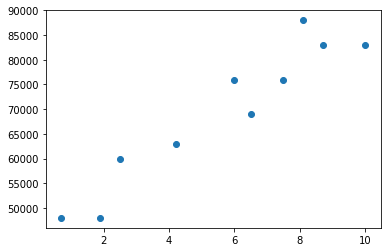

In [25]:
import matplotlib.pyplot as plt
x,y=[],[]
for a,b in salaries_and_tenures:
    y.append(a)
    x.append(b)
plt.scatter(x,y)
plt.show()

In [26]:
# keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)

In [27]:
for salary, tenure in salaries_and_tenures:
     salary_by_tenure[tenure].append(salary)

In [28]:
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}


In [29]:
salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

It might be more helpful to bucket the tenures:


In [30]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"


In [31]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)


And finally compute the average salary for each group:


In [32]:
average_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [33]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

And you have your soundbite: “Data scientists with more than five years experience
earn 65% more than data scientists with little or no experience!”

In [34]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

In [35]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")]

In [36]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [37]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


It’s been a successful first day! Exhausted, you slip out of the building before anyone
else can ask you for anything else. Get a good night’s rest, because tomorrow is new
employee orientation. (Yes, you went through a full day of work before new employee
orientation. Take it up with HR.)

In [38]:
students[(90,"A"),
        (85,"A"),
        (85,"A"),
        (80,"A"),
        (80,"A"),
        (80,"A"),
        (80,"A"),
        (75,"B")]

NameError: name 'students' is not defined